# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [2]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
617 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 617
Submissions graded.


### Dataset

In [3]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [4]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [5]:
# Filter by Graduate Year
specific_graduateyears = [2020, 2021, 2022, 2023, 2024]
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [6]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [7]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 544 student submissions.



### Institutions

Institution
Norges teknisk-naturvitenskapelige universitet (NTNU)    450
Universtitetet i Bergen (UiB)                             77
Høgskulen på Vestlandet (HVL)                             14
Name: count, dtype: int64


<Axes: ylabel='count'>

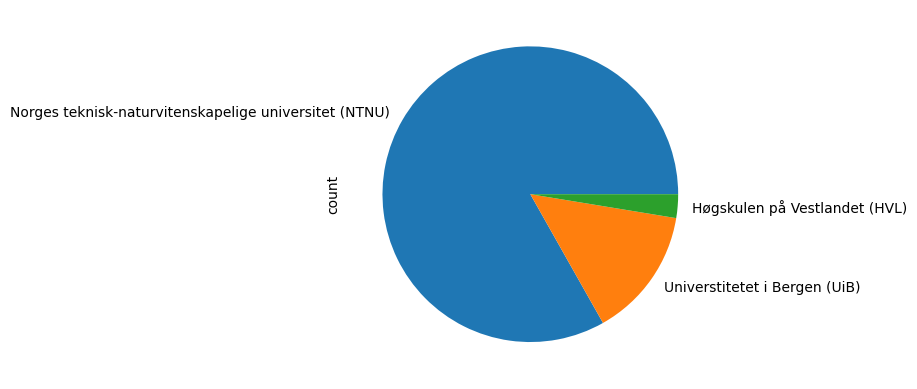

In [8]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2024     133
2023     131
2022     128
2021      46
2019      21
2020      14
2018       9
2016       4
2017       3
2010       2
2015       2
2014       2
2008       1
Annet      1
2012       1
Name: count, dtype: int64


<Axes: ylabel='count'>

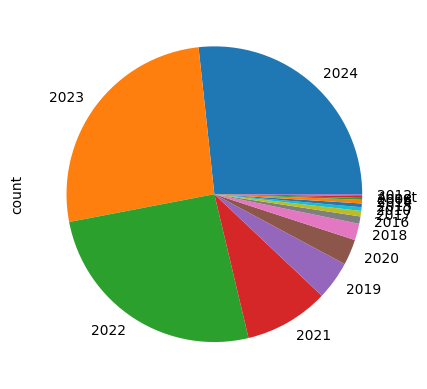

In [9]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    314
f    192
      38
Name: count, dtype: int64
Gender
m    0.577206
f    0.352941
     0.069853
Name: proportion, dtype: float64


<Axes: ylabel='count'>

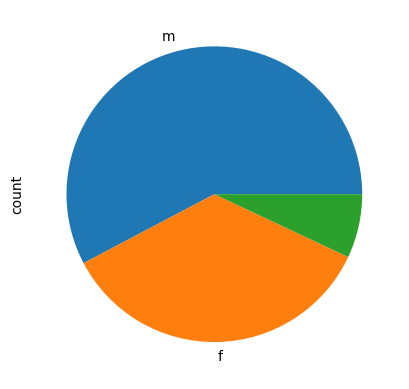

In [10]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [11]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

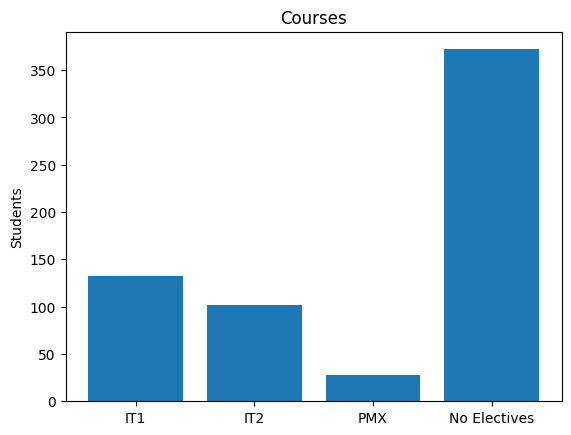

In [12]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

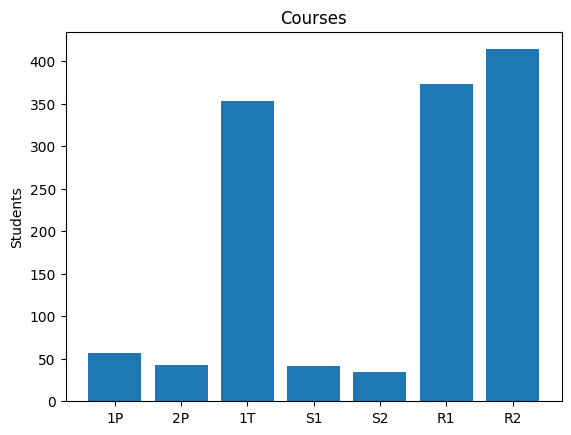

In [13]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    411
Ja     132
Name: count, dtype: int64
OutsideExperience
Nei    0.756906
Ja     0.243094
Name: proportion, dtype: float64


<Axes: ylabel='count'>

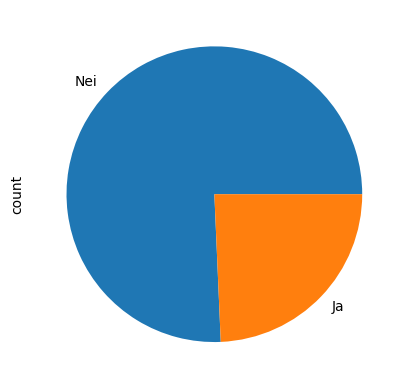

In [14]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [15]:
# Configurations
bins = 25
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 25.022
Standard deviation: 17.142


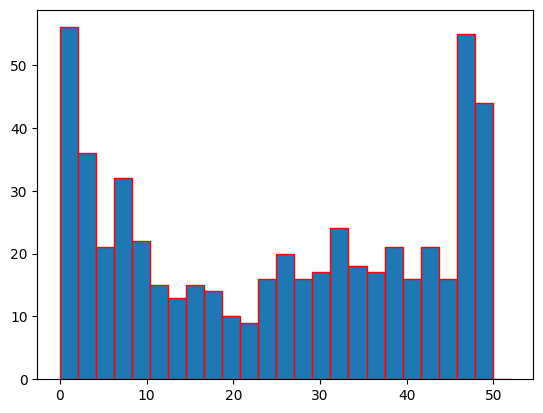

In [16]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.show() 

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

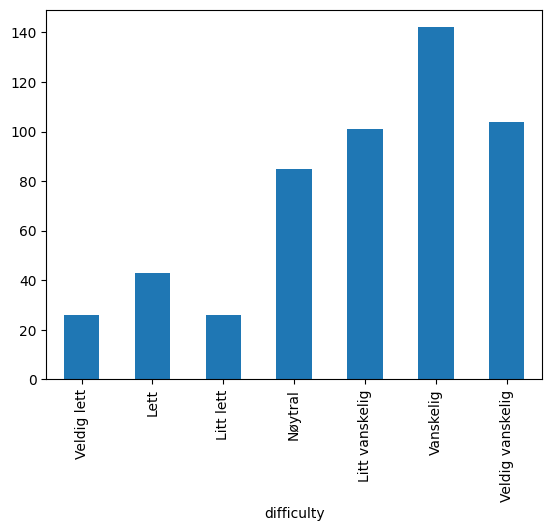

In [17]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [18]:
def compare_distributions(x, y, x_label, y_label):
    mean = x.mean()
    sd = x.std()
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()
    
    mean = y.mean()
    sd = y.std()
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

Mean of 2023 and 2024: 32.954
Standard deviation of 2023 and 2024: 13.976

Mean of before 2023: 17.544
Standard deviation of before 2023: 16.496


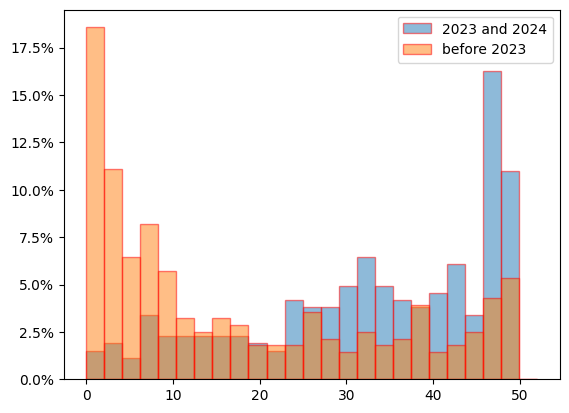

In [19]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

### Gender

Mean of women: 18.304
Standard deviation of women: 15.503

Mean of men: 28.943
Standard deviation of men: 16.789


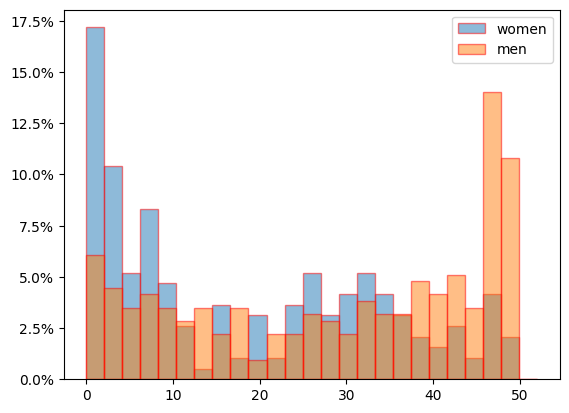

In [20]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [21]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [22]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       59.10 %
Booleans        65.14 %
Variables       57.25 %
Conditionals    64.06 %
Loops           29.70 %
Lists           41.87 %
Functions       29.70 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [23]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [24]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
1    301
0    243
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             301
Jeg vet ikke    178
str              28
float            25
list              7
bool              4
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    310
0    234
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           310
Jeg vet ikke    177
int              29
str              16
bool              8
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
1    282
0    262
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             282
Jeg vet ikke    217
int              14
float            13
bool             13
list              2
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    393
0    151
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            393
Jeg vet ikke    133
int              14

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [25]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    442
0    102
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            442
I don't know     68
12.0              9
1212.0            5
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [26]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    365
0    179
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           365
I don't know     99
12.23             4
13.0              3
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [27]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    544
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        224
I don't know    145
246.0            28
0.0               2
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [28]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    362
0    182
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             362
I don't know    114
1.0              17
3.0               7
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [29]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    338
1    206
Name: count, dtype: int64

Top 4 most common answers:
Operators5
bca             202
I don't know    194
'bca'             9
abc               9
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [30]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    345
0    199
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0    345
10.0     11
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    333
0    211
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            333
I don't know    183
10.0             19
1.0               1
2.0               1
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [31]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    325
0    219
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    325
20.0     21
2.0       1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
1    328
0    216
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            328
I don't know    195
20.0             16
30.0              1
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [32]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    321
0    223
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    321
10.0     12
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
1    292
0    252
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            292
I don't know    209
10.0             38
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [33]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
1    300
0    244
Name: count, dtype: int64

Top 5 most common answers:
Series([], Name: count, dtype: int64)
Number of correct responses:
Variables4b_points
1    309
0    235
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            309
I don't know    211
20.0             19
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [34]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    314
0    230
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    314
30.0     14
10.0      4
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    322
0    222
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
30.0    322
20.0      6
10.0      2
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
1    320
0    224
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            320
I don't know    209
10.0              4
20.0              4
10000.0           1
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [35]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    313
0    231
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    313
20.0      7
10.0      4
6.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0    273
1    271
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
30.0    271
10.0     48
20.0      5
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0    277
1    267
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
30.0            267
I don't know    210
20.0             37
10.0             20
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [36]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            444
Jeg vet ikke     85
False             6
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           477
Jeg vet ikke     48
True              9
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            411
Jeg vet ikke     70
False            53
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           470
Jeg vet ikke     51
True              9
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            455
Jeg vet ikke     55
False            23
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           431
Jeg vet ikke     94
True             10
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [37]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           316
Jeg vet ikke    197
True             20
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           409
Jeg vet ikke    114
True             12
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            323
Jeg vet ikke    147
False            63
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            404
Jeg vet ikke    117
False            10
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            334
Jeg vet ikke    150
False            51
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    270
True            247
False            18
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [38]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
False           266
Jeg vet ikke    251
True             14
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    271
False           238
True             19
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    262
True            250
False            18
Name: count, dtype: int64

Top 3 most common answers:
True and True
True            284
Jeg vet ikke    233
False            13
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    245
True            226
False            59
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    289
True            215
False            25
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [39]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            440
Jeg vet ikke     67
False            26
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           417
Jeg vet ikke    113
True              4
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           418
Jeg vet ikke     86
True             27
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            344
Jeg vet ikke    115
False            72
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            396
Jeg vet ikke     99
False            41
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
False           290
Jeg vet ikke    194
True             49
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [40]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    396
0    148
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       396
Jeg vet ikke     93
1                51
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [41]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
1    304
0    240
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               304
Jeg vet ikke    189
1                29
1 og 2            8
Ingenting         7
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [42]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    359
0    185
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               359
Jeg vet ikke    140
2 og 3           16
3                 9
1                 7
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [43]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    335
0    209
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          335
Jeg vet ikke    140
1                34
1 og 3           11
2                 8
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [44]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    319
1    225
Name: count, dtype: int64

Top 5 most common answers:
Loops1
10.0            225
I don't know    165
9.0              60
1.0              37
123456789.0      21
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [45]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    336
1    208
Name: count, dtype: int64

Top 5 most common answers:
Loops2
10.0            208
I don't know    161
8.0              58
2.0              38
2468.0           23
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [46]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    544
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             293
I don't know    200
0                13
102               4
98                1
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [47]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    352
1    192
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    197
4.0             192
3.0              56
1.0              24
0.0              22
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [48]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    357
1    187
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    311
5.0             187
0.0               9
125.0             6
3.0               5
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [49]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    367
1    177
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    322
9.0             177
0.0               7
49.0              3
-14.0             3
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [50]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    341
1    203
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    220
20.0            203
10.0            102
102030.0          8
101.0             1
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [51]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    338
1    206
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    228
25.0            206
15.0             90
152535.0          4
65.0              2
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [52]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
1    314
0    230
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    314
Jeg vet ikke    187
[15, 35, 55]      6
[5, 15, 25]       4
[10, 35, 30]      1
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    356
1    188
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    247
[5, 35, 25]     188
[15, 35, 55]     55
[5, 15, 25]      25
[10, 35, 30]      9
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [53]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
1    280
0    264
Name: count, dtype: int64

Top 5 most common answers:
Functions1
15.0            280
I don't know    243
5.1               5
510.0             4
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [54]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    333
1    211
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    297
1.0             211
2.0              13
100.0             7
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [55]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    427
1    117
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    305
1.0             117
12.0             55
1.2              25
3.0              16
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [56]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    382
1    162
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    354
5.0             162
6.0               9
9.0               1
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [57]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    364
1    180
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    264
10.0            180
6.0              35
9.0              29
5.0              11
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [58]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    407
1    137
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know       374
abcxyz             135
abcxabcyabcz         5
abc x y z            3
abcxabcxyabcxyz      2
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [59]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    381
1    163
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    338
c               158
b                17
C                 5
6                 1
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [60]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    374
1    170
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    334
25.0            170
15.0             20
21.0              2
152535.0          2
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [61]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    510
1     34
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    377
80.0             63
90.0             34
21.0             10
23.0              6
Name: count, dtype: int64
